In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df = pd.read_csv('vehicles_us (2).csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [5]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [8]:
# Check for missing values
df_missing = df.isnull().sum()

In [13]:
# Filling missing values (replace NaN values with appropriate values)
df['odometer'].fillna(df['odometer'].median(), inplace=True)
df['paint_color'].fillna('Unknown', inplace=True)

# Convert the 'model_year' column to datetime format (assuming it's a year)
df['model_year'] = pd.to_datetime(df['model_year'], errors='coerce')

# Calculate the total sales for each game and put these values in a separate column
df['type'] = df[['odometer']].sum(axis=1)
df.head()


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,1970-01-01 00:00:00.000002011,bmw x5,good,6.0,gas,145000.0,automatic,145000.0,Unknown,1.0,2018-06-23,19
1,25500,NaT,ford f-150,good,6.0,gas,88705.0,automatic,88705.0,white,1.0,2018-10-19,50
2,5500,1970-01-01 00:00:00.000002013,hyundai sonata,like new,4.0,gas,110000.0,automatic,110000.0,red,NaN,2019-02-07,79
3,1500,1970-01-01 00:00:00.000002003,ford f-150,fair,8.0,gas,113000.0,automatic,113000.0,Unknown,NaN,2019-03-22,9
4,14900,1970-01-01 00:00:00.000002017,chrysler 200,excellent,4.0,gas,80903.0,automatic,80903.0,black,NaN,2019-04-02,28


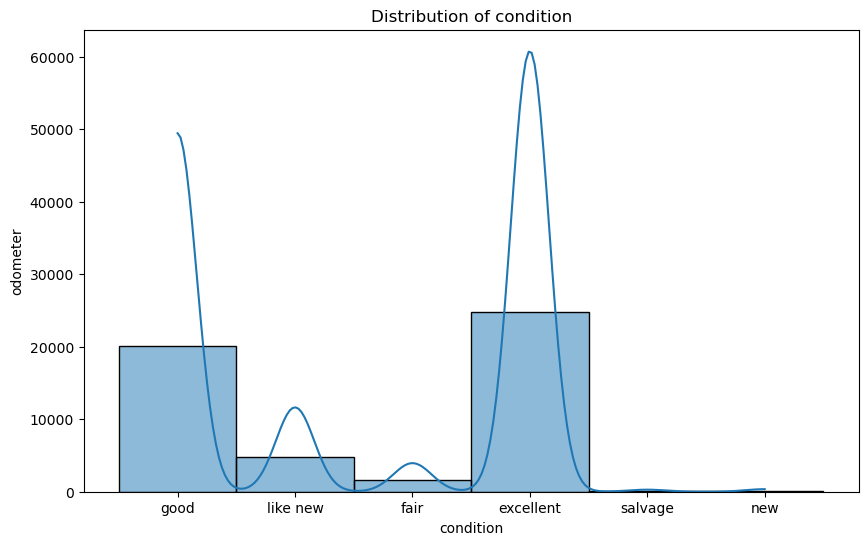

In [14]:
# Visualize the distribution of condition using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['condition'], bins=30, kde=True)
plt.title('Distribution of condition')
plt.xlabel('condition')
plt.ylabel('odometer')
plt.show()

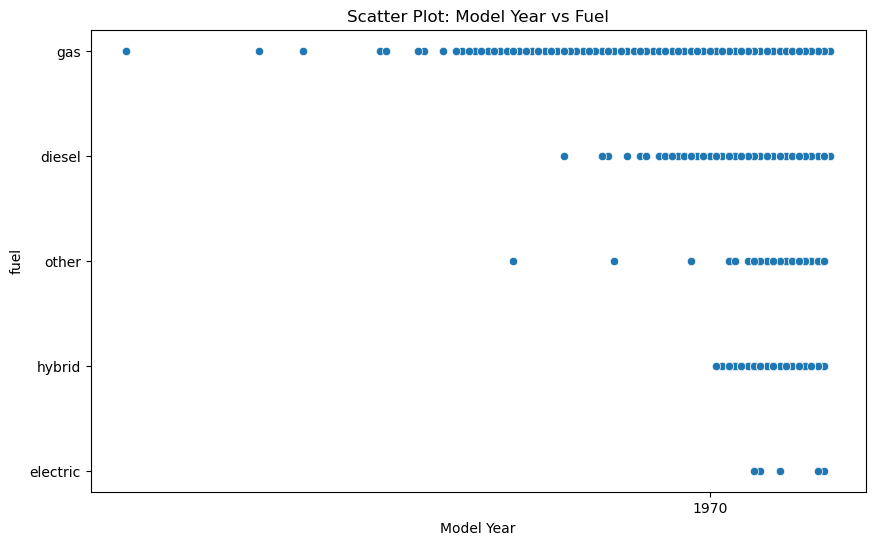

In [16]:
# Visualize the relationship between year and Fuel using a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='model_year', y='fuel', data=df)
plt.title('Scatter Plot: Model Year vs Fuel')
plt.xlabel('Model Year')
plt.ylabel('fuel')
plt.show()

In [17]:
# Save the processed data to a new CSV file
df.to_csv('vehicles_us_processed.csv', index=False)